**Import Libraries & Load Data**

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

In [52]:
# Load data
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Data Cleaning**

In [53]:
# Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [54]:
# Convert TotalCharges to numeric
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
'''errors : {'ignore', 'raise', 'coerce'}, default 'raise'
    - If 'raise', then invalid parsing will raise an exception.
    - If 'coerce', then invalid parsing will be set as NaN.
    - If 'ignore', then invalid parsing will return the input'''


"errors : {'ignore', 'raise', 'coerce'}, default 'raise'\n    - If 'raise', then invalid parsing will raise an exception.\n    - If 'coerce', then invalid parsing will be set as NaN.\n    - If 'ignore', then invalid parsing will return the input"

In [55]:
#check null value
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [56]:
#fill null value with median
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())


In [57]:
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [58]:
# Drop customerID
df=df.drop('customerID',axis=1)
#axis : {0 or 'index', 1 or 'columns'}, default 0

In [59]:
# change target variable in binary format
df['Churn']=df['Churn'].map({'Yes':1,'No':0})

In [60]:
#df.to_excel("churn_cleaned_data_powerbi.xlsx", index=False)

**Exploratory Data Analysis (EDA)**

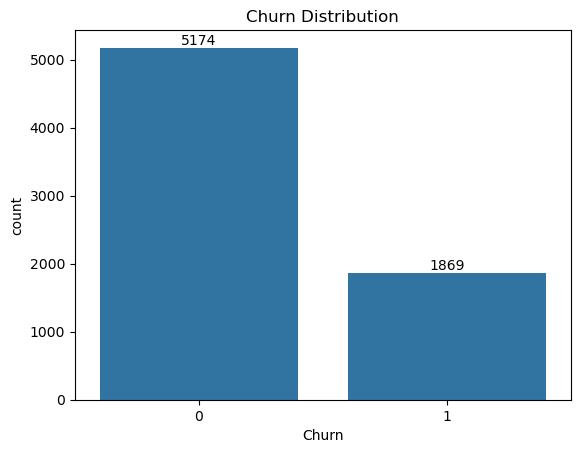

In [61]:
# Check churn balance
ax=sns.countplot(x='Churn',data=df)
ax.bar_label(ax.containers[0])
plt.title('Churn Distribution')
plt.show()

In [62]:
chrn_count=df['Churn'].value_counts()
chrn_count

Churn
0    5174
1    1869
Name: count, dtype: int64

Text(0.5, 1.0, 'Percentage Of Churn Customer')

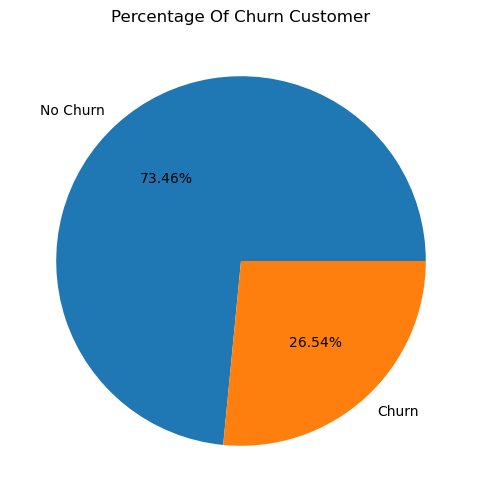

In [63]:
plt.figure(figsize=(6,6))
plt.pie(chrn_count, labels=['No Churn', 'Churn'],autopct='%1.2f%%')
plt.title('Percentage Of Churn Customer')

**in above we undestand 73% people is not chrn and 27% people is chrun out**

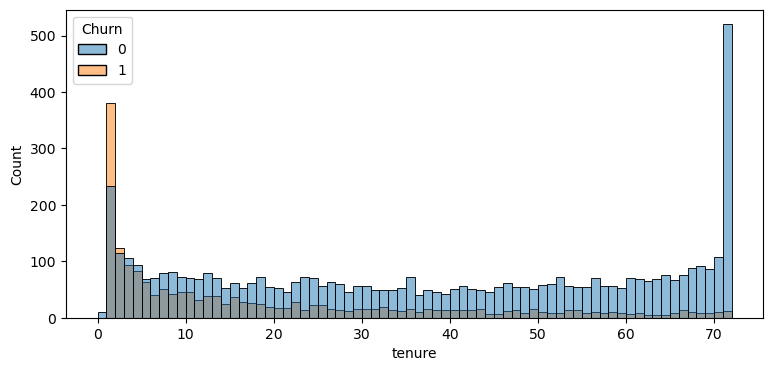

In [64]:
plt.figure(figsize=(9,4))
sns.histplot(x='tenure',data=df,bins=72,hue='Churn')
plt.show()

**in above we undestand who have used servcies is long time its stay who using only 1 and 2 month is churned**

In [65]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

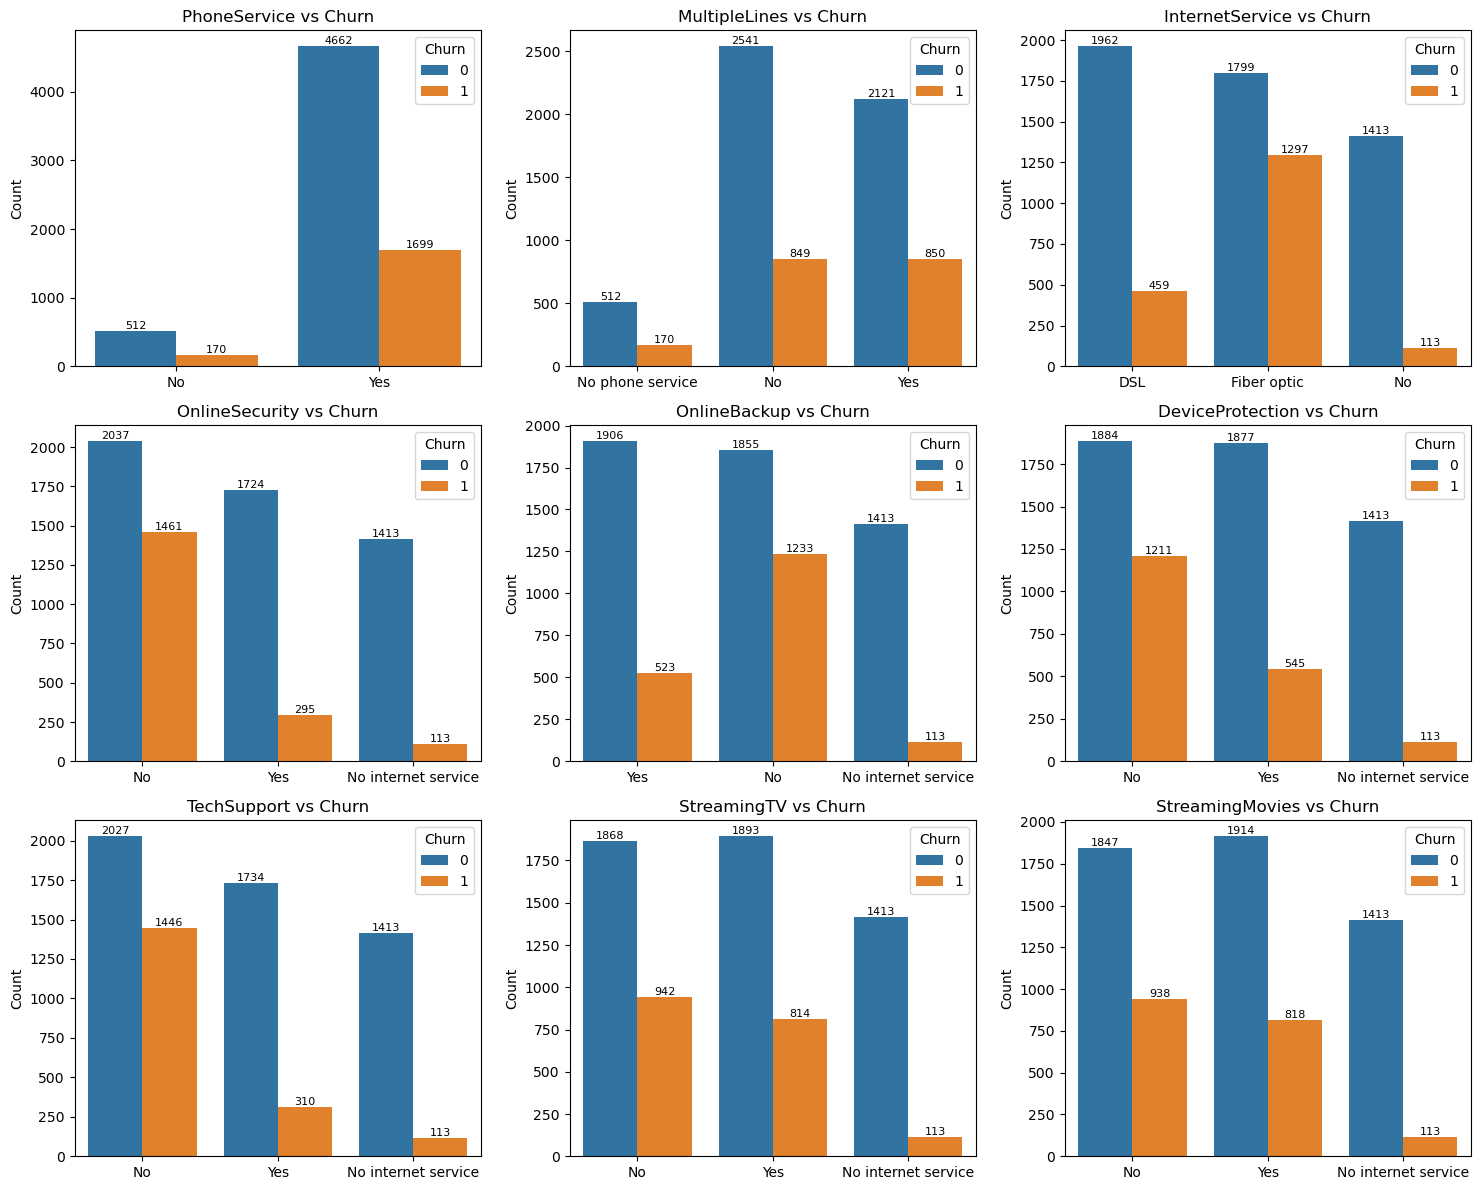

In [66]:
# Columns to plot
cols = [
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies'
]

# Create subplot grid (3 rows × 3 columns)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()  # Flatten 2D array of axes for easy iteration

# Loop through columns
for i, col in enumerate(cols):
    sns.countplot(x=col, data=df, hue='Churn', ax=axes[i])
    axes[i].set_title(f'{col} vs Churn', fontsize=12)
    axes[i].bar_label(axes[i].containers[0], fontsize=8)
    if len(axes[i].containers) > 1:
        axes[i].bar_label(axes[i].containers[1], fontsize=8)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Remove extra empty plots (if any)
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**in above Customers without internet-based add-ons (like OnlineSecurity, TechSupport, or DeviceProtection) tend to churn more frequently. Fiber optic users also exhibit higher churn rates compared to DSL users. Overall, having additional services (security, backup, or protection) is linked with lower churn**

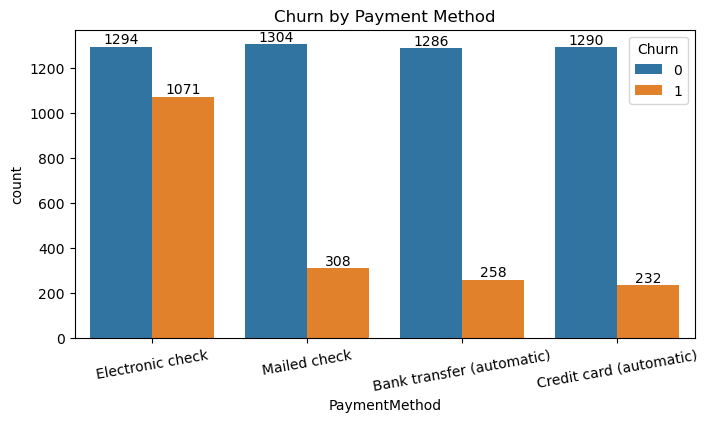

In [67]:
# analysis using paymnet method
plt.figure(figsize=(8,4))
ax=sns.countplot(x='PaymentMethod',hue='Churn',data=df)
for containers in ax.containers:
    ax.bar_label(containers)
#ax.bar_label(ax.containers[0])
plt.title("Churn by Payment Method")
plt.xticks(rotation=10)
plt.show()

**Customer is churn out when they are using Electronic Check**

In [68]:
# Numeric summary
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928,0.265370
std,0.368612,24.559481,30.090047,2265.270398,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


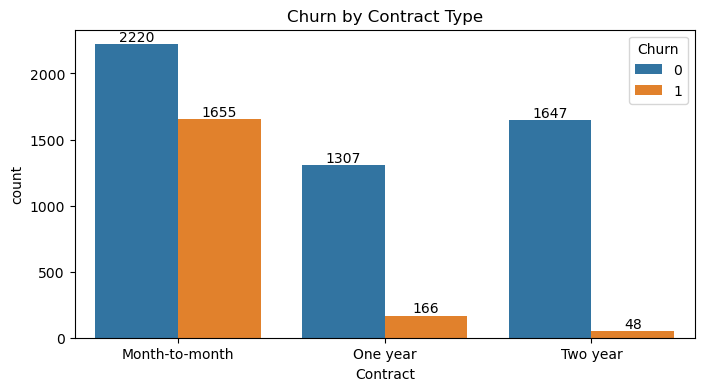

In [69]:
# Categorical distribution example
plt.figure(figsize=(8,4))
ax=sns.countplot(x='Contract',hue='Churn',data=df)
for containers in ax.containers:
    ax.bar_label(containers)
#ax.bar_label(ax.containers[0])
plt.title("Churn by Contract Type")
plt.show()

**in above you can say month to month contrcat base customert is chrun more and for log term one year and 2 year customer is stay. for that we need to convey to customer contract for long time**

**Feature Encoding & Scaling**

In [70]:
# Encode categorical columns(in this categorical columns store in 1 variable)
cat_col=df.select_dtypes(include='object').columns
cat_col

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [71]:
#in this we convert categorical columns in True False Format and drop firt orignal column df =
df =pd.get_dummies(df,columns=cat_col,drop_first=True)
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,True,True,True,True,False,...,False,True,False,True,True,False,True,False,False,True
7039,0,72,103.20,7362.90,0,False,True,True,True,False,...,False,True,False,True,True,False,True,True,False,False
7040,0,11,29.60,346.45,0,False,True,True,False,True,...,False,False,False,False,False,False,True,False,True,False
7041,1,4,74.40,306.60,1,True,True,False,True,False,...,False,False,False,False,False,False,True,False,False,True


In [75]:
# Split data in x and y 
x = pd.get_dummies(df.drop('Churn', axis=1), drop_first=True)
feature_names = x.columns.tolist()
joblib.dump(feature_names, "feature_names.pkl")
y = df['Churn']

In [76]:
x.columns


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [77]:
# Train-test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
'''random_state : default=None
    Controls the shuffling applied to the data before applying the split.
shuffle : default=True
    Whether or not to shuffle the data before splitting. If shuffle=False
    then stratify must be None.'''

'random_state : default=None\n    Controls the shuffling applied to the data before applying the split.\nshuffle : default=True\n    Whether or not to shuffle the data before splitting. If shuffle=False\n    then stratify must be None.'

In [78]:
# Scale
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

**Model Training (Logistic Regression & Random Forest)**

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [80]:
models={'Logistic Regression':LogisticRegression(),
   'Random Forest':RandomForestClassifier(n_estimators=100,random_state=42)}
'''n_estimators : int, default=100
    The number of trees in the forest.
random_state :default=None
    Controls both the randomness of the bootstrapping of the samples used
    when building trees (if ``bootstrap=True``) and the sampling of the
    features to consider when looking for the best split at each node'''

'n_estimators : int, default=100\n    The number of trees in the forest.\nrandom_state :default=None\n    Controls both the randomness of the bootstrapping of the samples used\n    when building trees (if ``bootstrap=True``) and the sampling of the\n    features to consider when looking for the best split at each node'

In [81]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f"=== {name} ===")
    print('acurracy score',accuracy_score(y_test,y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 40)

=== Logistic Regression ===
acurracy score 0.8069552874378992
ROC-AUC: 0.7302823632746905
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.57      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

----------------------------------------
=== Random Forest ===
acurracy score 0.7856635911994322
ROC-AUC: 0.6918830246195975
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409

----------------------------------------


**in above Logistic Regression outperforms Random Forest in this case, with higher accuracy, ROC-AUC, and recall.Therfore Logistic Regression It’s the better choice for predicting churn in this dataset.**

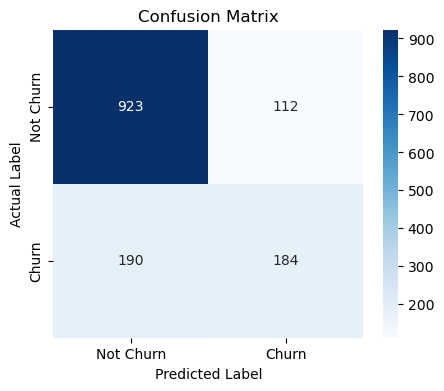

In [82]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()


**Feature Importance (for Random Forest)**

In [83]:
x.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [84]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x, y) 

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [85]:
importances = pd.Series(rf.feature_importances_, index=x.columns)
importances.sort_values(ascending=False).head(10)

TotalCharges                      0.192846
tenure                            0.173395
MonthlyCharges                    0.172255
InternetService_Fiber optic       0.039823
PaymentMethod_Electronic check    0.035774
Contract_Two year                 0.032939
gender_Male                       0.028368
OnlineSecurity_Yes                0.026899
PaperlessBilling_Yes              0.025229
TechSupport_Yes                   0.023075
dtype: float64

**its tell you how important each feature was in making predictions.**

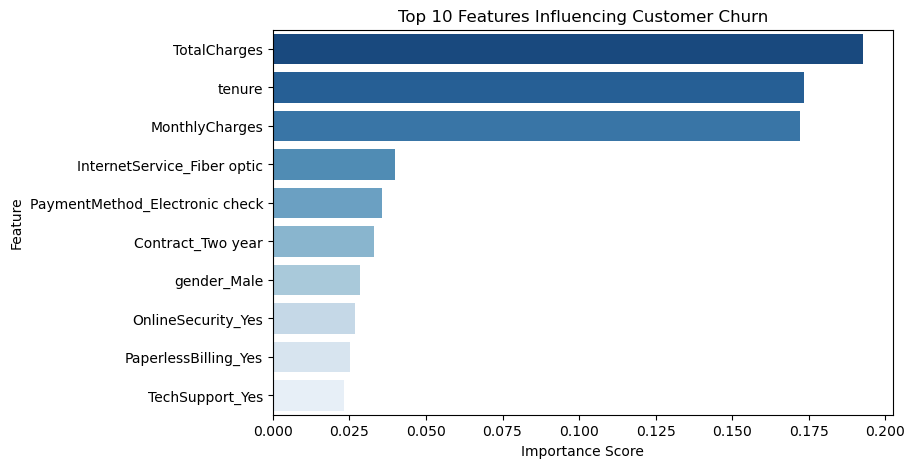

In [86]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=importances.nlargest(10),
    y=importances.nlargest(10).index,
    palette='Blues_r'
)
plt.title("Top 10 Features Influencing Customer Churn")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

**Financial factors (charges) and customer tenure are the strongest churn drivers.Service experience (security, support) helps retain customers.
Payment and internet type also influence behavior, showing that both pricing and service quality matter.In short: High charges + short tenure + fiber optic users + electronic check payments = higher churn risk**

**improving recall for churn class**

**Use Class Weights**

**RandomForest supports class_weight='balanced' that forces model to pay more attention to minority class**

In [87]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



**The use of class weights did not result in any significant improvement in recall.**

**Now We Are Using SMOTE Oversampling**

In [88]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

X_resampled, y_resampled = sm.fit_resample(x_train, y_train)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_resampled, y_resampled)

y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1035
           1       0.57      0.60      0.59       374

    accuracy                           0.78      1409
   macro avg       0.71      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



**Using SMOTE results are better than before — especially recall for churn (class 1) improving from 0.50 → 0.60.
But we can still push churn recall higher**

**Now Try To Use Both SMOTE + Class Weight Together**

In [89]:
sm = SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

rf = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',
    random_state=42
)
rf.fit(x_train_res, y_train_res)

y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1035
           1       0.58      0.60      0.59       374

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



**Using Both SMOTE + class_weight results are almost the same as pure SMOTE**

**Now we are using Threshold Tuning By default, prediction threshold = 0.50 So values like 0.40 or 0.35 are treated as NON-churn So we LOWER the threshold to 0.35
to catch more churn customers.**

In [90]:
y_prob = rf.predict_proba(x_test)[:, 1]

**in this only take the probability of class 1**

In [91]:
y_pred_35 = (y_prob >= 0.35).astype(int)
print("Threshold = 0.35")
print(classification_report(y_test, y_pred_35))

Threshold = 0.35
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1035
           1       0.51      0.75      0.60       374

    accuracy                           0.74      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.79      0.74      0.75      1409



**So Improved churn recall from 0.50 to 0.75 using probability threshold tuning (0.35)**

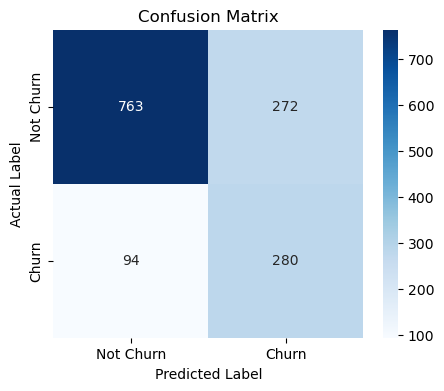

In [92]:
cm = confusion_matrix(y_test, y_pred_35)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [93]:
import joblib
joblib.dump(rf, "churn_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [94]:
import os
print(os.getcwd())

C:\Users\Admin
